In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

D:\Anaconda4.3.0\envs\tensorflow\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [5]:
print("train data:",' images:' ,x_img_train.shape,"labels:",y_label_train.shape)
print("test data:",'images:' ,x_img_test.shape,"labels:",y_label_test.shape)

train data:  images: (50000, 32, 32, 3) labels: (50000, 1)
test data: images: (10000, 32, 32, 3) labels: (10000, 1)


In [6]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [7]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [9]:
model=Sequential()

In [10]:
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(32,32,3),padding='same',activation='relu'))

In [11]:
model.add(Dropout(0.25))

In [12]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [13]:
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))

In [14]:
model.add(Dropout(0.25))

In [15]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [16]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [19]:
model.add(Dense(1024,activation='relu'))
model.add(Dropout(rate=0.25))

In [21]:
model.add(Dense(10,activation='softmax'))

In [22]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

In [23]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [24]:
train_history=model.fit(x_img_train_normalize,y_label_train_OneHot,validation_split=0.2,epochs=10,batch_size=128,verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 157s 4ms/step - loss: 1.5023 - acc: 0.4589 - val_loss: 1.2754 - val_acc: 0.5805
Epoch 2/10
40000/40000 [==============================] - 154s 4ms/step - loss: 1.1380 - acc: 0.5980 - val_loss: 1.1102 - val_acc: 0.6393
Epoch 3/10
40000/40000 [==============================] - 157s 4ms/step - loss: 0.9815 - acc: 0.6573 - val_loss: 1.0193 - val_acc: 0.6614
Epoch 4/10
40000/40000 [==============================] - 150s 4ms/step - loss: 0.8726 - acc: 0.6934 - val_loss: 0.9463 - val_acc: 0.6925
Epoch 5/10
40000/40000 [==============================] - 152s 4ms/step - loss: 0.7793 - acc: 0.7266 - val_loss: 0.8892 - val_acc: 0.7035
Epoch 6/10
40000/40000 [==============================] - 151s 4ms/step - loss: 0.6979 - acc: 0.7548 - val_loss: 0.8422 - val_acc: 0.7219
Epoch 7/10
40000/40000 [==============================] - 151s 4ms/step - loss: 0.6148 - acc: 0.7841 - val_loss: 0.8140 - 

In [27]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

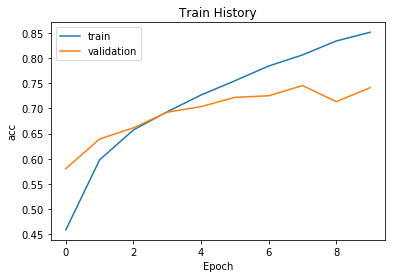

In [28]:
show_train_history(train_history,'acc','val_acc')

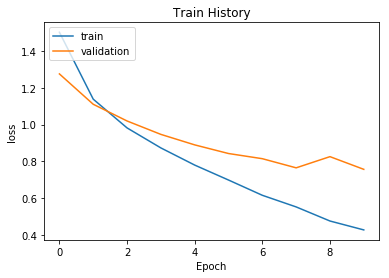

In [29]:
show_train_history(train_history,'loss','val_loss')

In [32]:
scores = model.evaluate(x_img_test_normalize,y_label_test_OneHot,verbose=0)
print()
print('accuracy=',scores[1])


accuracy= 0.7302


In [33]:
prediction=model.predict_classes(x_img_test_normalize)

In [34]:
prediction[:10]

array([5, 8, 0, 0, 6, 6, 1, 6, 3, 1], dtype=int64)

In [38]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num>25: num=25
    for i in range(0,num):
        ax=plt.subplot(5,5,1+i)
        ax.imshow(images [idx],cmap='binary')
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

In [40]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

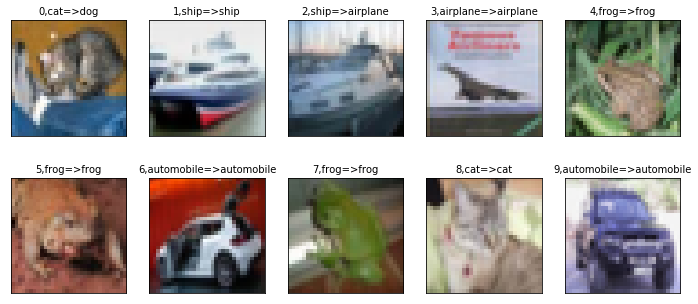

In [41]:
plot_images_labels_prediction(x_img_test,y_label_test,prediction,0,10)

In [42]:
Predicted_Probability=model.predict(x_img_test_normalize)

In [45]:
def show_Predicted_Probability(y,prediction,x_img,Predicted_Probability,i):
    print('label:',label_dict[y[i][0]],'predict',label_dict[prediction[i]])
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(x_img_test[i],(32, 32,3)))
    plt.show()
    for j in range(10):
        print(label_dict[j]+' Probability:%1.9f'%(Predicted_Probability[i][j]))


label: cat predict dog


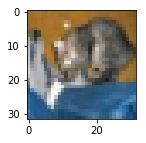

airplane Probability:0.002562496
automobile Probability:0.001298895
bird Probability:0.014891285
cat Probability:0.314291477
deer Probability:0.011439024
dog Probability:0.625558138
frog Probability:0.019219156
horse Probability:0.003974608
ship Probability:0.004556441
truck Probability:0.002208444


In [46]:
show_Predicted_Probability(y_label_test,prediction,x_img_test,Predicted_Probability,0)

label: airplane predict airplane


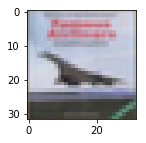

airplane Probability:0.773815989
automobile Probability:0.000467651
bird Probability:0.087175868
cat Probability:0.000538186
deer Probability:0.014081186
dog Probability:0.000019095
frog Probability:0.000043413
horse Probability:0.000020244
ship Probability:0.123646565
truck Probability:0.000191877


In [47]:
show_Predicted_Probability(y_label_test,prediction,x_img_test,Predicted_Probability,3)

In [48]:
prediction.shape

(10000,)

In [50]:
y_label_test.shape

(10000, 1)

In [51]:
y_label_test.reshape(-1)

array([3, 8, 8, ..., 5, 1, 7])

In [52]:
import pandas as pd
print(label_dict)
pd.crosstab(y_label_test.reshape(-1),prediction,rownames=['label'],colnames=['predict'])

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict    0    1    2    3    4    5    6    7    8    9
label                                                    
0        791    8   60    9   13   12   19    8   56   24
1         28  799   19   13    2    6   20    6   32   75
2         54    1  673   24   86   51   82   19    7    3
3         17    7  104  427   66  211  127   25    8    8
4         19    2   94   30  699   32   89   28    6    1
5         10    3   67  115   48  657   62   30    3    5
6          4    2   42   25   15   12  895    2    2    1
7         11    1   50   16   78   68   15  755    5    1
8         50   26   30    6   14   15   12    1  834   12
9         47   68   22   22    4   15   13   12   25  772

In [65]:
model=Sequential()

In [66]:
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [67]:
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [68]:
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [69]:
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(2500,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1500,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))

In [70]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [71]:
train_history=model.fit(x_img_train_normalize,y_label_train_OneHot,validation_split=0.2,epochs=50,batch_size=300,verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 348s 9ms/step - loss: 1.9544 - acc: 0.2672 - val_loss: 2.2167 - val_acc: 0.2338
Epoch 2/50
40000/40000 [==============================] - 343s 9ms/step - loss: 1.5082 - acc: 0.4394 - val_loss: 1.6053 - val_acc: 0.4353
Epoch 3/50
40000/40000 [==============================] - 349s 9ms/step - loss: 1.2811 - acc: 0.5331 - val_loss: 1.2416 - val_acc: 0.5603
Epoch 4/50
40000/40000 [==============================] - 349s 9ms/step - loss: 1.1228 - acc: 0.5961 - val_loss: 1.1344 - val_acc: 0.6139
Epoch 5/50
40000/40000 [==============================] - 346s 9ms/step - loss: 1.0202 - acc: 0.6377 - val_loss: 0.9512 - val_acc: 0.6625
Epoch 6/50
40000/40000 [==============================] - 348s 9ms/step - loss: 0.9196 - acc: 0.6721 - val_loss: 0.9281 - val_acc: 0.6807
Epoch 7/50
40000/40000 [==============================] - 345s 9ms/step - loss: 0.8459 - acc: 0.6970 - val_loss: 0.8942 - 

In [74]:
scores = model.evaluate(x_img_test_normalize,y_label_test_OneHot,verbose=0)
print()
print('accuracy=',scores[1])


accuracy= 0.7921


In [79]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("加载 模型成功！继续训练模型")
except:
    print("加载模型失败！开始训练一个新模型")

加载模型失败！开始训练一个新模型


In [80]:
train_history=model.fit(x_img_train_normalize,y_label_train_OneHot,validation_split=0.2,epochs=2,batch_size=128,verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/2
40000/40000 [==============================] - 446s 11ms/step - loss: 0.2324 - acc: 0.9204 - val_loss: 0.7346 - val_acc: 0.7895
Epoch 2/2
40000/40000 [==============================] - 437s 11ms/step - loss: 0.2245 - acc: 0.9231 - val_loss: 0.7314 - val_acc: 0.7903


In [82]:
import os
os.mkdir("SaveModel")
model.save_weights("SaveModel/cifarCnnModel.h5")
print("Saved model to disk")

Saved model to disk
